# Super Differentiator
## Qiang Fei, Shucheng Yan, Jordan Turley
### Harvard University COMPSCI 207

### Introduction

Differentiation has been a major topic of calculus for a long time for its wide application in studies of almost all major science deciplines. It's especially often used in studying the behaviours of models and is also essential for solving optimization problems. Multiple ways have been developed to solve differential equations, through deriving an exact fomula or through estimating by numerical methods. Automatic differentiation is one important way that we use to solve differential problems. It utilizes the power of a computer to replace manual work and yield results with desired efficiency. It’s important because sometimes differentiation requires tedious calculations and is also likely to be inaccurate due to complexity of equations, and we want computers to solve these problems automatically for us. Thus, in this project, we will implement an automatic diffrentiator using forward mode to solve differentiation problems for users.


### Background

Chain rule and graph structures will be the cornerstone underlying our program to differentiate various functions. The differentiation process of a complex function can be decomposed into calculating the derivatives of a chain of simple functions. The idea of computation graph will guide how the chain of derivatives will be evaluated and combined to reach the final answer.

#### Chain Rule
One important result in calculus that we use in differentiation is the chain rule, where we calculate the derivative of some function `f(x)` with respect to `x` as the product of the derivative of `f` with respect to some other variable that is also a function of `x` and the derivative of that function with respect to `x`. In mathematical formula, it's represented below:
$$\frac{d}{dx}f\left[u(x)\right] = f'\left[u(x)\right] \cdot u'(x)$$
or
$$\frac{dy}{dx} = \frac{dy}{du} \times \frac{du}{dx}$$
where `f`,`y`,`u` are functions of `x`.
Chain rule also works in multidimentional case when we have a vector of variables. Then `f`,`y`,`u` will be vectors and their derivatives will be matrices. This derivaitve is called the Jacobian. The Jacobian for a function of two inputs and two outputs is shown below.

For $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2, J = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
$

We then take the matrix product of the two calculated derivatives to get the final answer, which is again a vector. Chain rule underlies our automatic differentiation package as it allows us to break down equations to small parts of elementary functions for calculating derivative, and we then aggregate the final result using chain rule. A better exlaination of how we aggregate results will be explained under graph structure of calculation, and before that we would introduce what we mean by elemetary functions. 

#### Elementary functions
By elementary functions, we mean the functions that cannot be decomposed as aan appregation of some functions applied one by another. These functions include +, -, x, /, square root, logarithms and trigonometric functions. The functions input that we are going to deal with can be regarded as a combination of one or more such functions.


#### Graph structure of Calculation
Graph structure of calculate presents better visualization of how we use chain rule to break down complex functions to elememtary functions. Here we include a small example of the graph sturcture of a simple function: $f(x,y) = sin(x) + 2y$
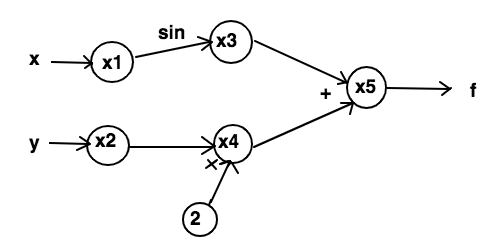
##### This is an image showing the graphical structure of the given equation. The image cannot be loaded on github but can be seen when this file is open locally. 

As we can see, the sample function is broken into nodes, where each node applies one elementary function to the variable and the function is eventrually composed at the end of the process. Through navigating trhough these nodes, we can calculate the value and derivative at each step and record and update these values when moving forward. At the final node, we shall have the desired result. For vector functions, we can just break each vector into a sequence of functions and apply this method to each of them.

#### Automatic differentiation
The introdution above shows one way of doing automatc differentiation, the forward mode, which we will implement in our package. Indeed, automatic differentiation is a collection of comptational methods to numerically evaluate the derivative of a function through breaking down the function to elementary operations.
It is efficient since we evaluate the function value and its derivative in linear time, based on the complexity of the function, since the chain rule and the graph structure works from the inside with the most basic pieces out to the full complexity of the whole function. It is also precise as it evaluate to machine precision at each step of the process.


### How to use SuperDifferentiator

The `SuperDifferentiator` package provides an easy way to calculate the derivative of scalar functions of several inputs and one output, and the Jacobian of vector functions of several inputs and several outputs.

#### Install Package

A user can install our package by cloning the GitHub repository and using `setuptools` or `pip`, or by downloading the package from PyPI. Code demonstrations of installation are given below.

`setuptools`
```
$ git clone https://github.com/super-differentiator/cs207-FinalProject.git
$ cd cs207-FinalProject
$ sudo pip install -r requirements.txt
$ sudo python3 setup.py install
```

`pip`
```
$ git clone https://github.com/super-differentiator/cs207-FinalProject.git
$ cd cs207-FinalProject
$ sudo pip install -r requirements.txt
$ sudo pip install .
```

PyPI:

```
pip install -i https://test.pypi.org/simple/ superdifferentiator-cs207-harvard==0.0.1
```

Then, the package will be installed. Note that the package requires Python version $\ge$ 3.6. To test, open another Terminal and open the `python3` shell and type,

```
>>> from superdifferentiator.forward.functions import X
```

If this executes then you have successfully installed the package.

#### Import Package

For scalar functions of several variables, the user must import each type of function they plan to use. An example is given below, if the user plans to use basic functions, sin, and the natural logarithm.

```
>>> from superdifferentiator.forward.functions import X, Sin, Ln
```

The `superdifferentiator.forward.functions` module provides implementations for the following functions:

- `X`
- Natural logarithm (`Ln`)
- Log base $a$ (`Log`)
- Exponential ($e^{\ldots}$) (`Exp`)
- Absolute value (`Abs`)
- `Sin`
- `Cos`
- `Tan`
- Square root (`Sqrt`)
- `Arcsin`
- `Arccos`
- `Arctan`
- `Sinh`
- `Cosh`
- `Tanh`
- `Logistic`

Examples will be given below in how these functions are used in practice.

For vector functions, the user must import the elementary functions the plan to use, but must also import the `Vector` module, as shown below.

```
>>> from superdifferentiator.forward.Vector import Vector
```

Again, examples will be given below how to use the `Vector` class in practice.

#### Use Package

For scalar functions, the user begins by importing the desired functions they will use. The user begins with an `X` object. `X` represents an independent variable in your function. However, the `X` class can be used for multiple different named independent variables, e.g. $x$, $y$, $z$, or $x_1$, $x_2$, etc. By default, the `X` class refers to the variable $x$, but any name of the variable can be passed in.

First, we will show a simple example of the function $f(x) = \text{sin}\left[\text{ln}(x) + 3x^2 + 2x + 7\right]$ for $x = 3$.

```
>>> from superdifferentiator.forward.functions import X, Ln, Sin
>>> x = X(3)
>>> fx = Sin(Ln(x) + (3 * x ** 2) + (2 * x) + 7)
>>> fx.val
[-0.25505810186107586]
>>> fx.der
{'x': [-19.6608231486877]}
```

We see the function value is about -0.255, and the derivative with respect to $x$ is -19.66. We can also evaluate the function for multiple values of $x$, as shown below. We will evaluate the same $f(x)$ for $x = 3$, $x = 5$, and $x = 7$.

```
>>> from superdifferentiator.forward.functions import X, Ln, Sin
>>> x = X([3, 5, 7])
>>> fx = Sin(Ln(x) + (3 * x ** 2) + (2 * x) + 7)
>>> fx.val
[-0.25505810186107586, -0.5958645016385826, 0.295431220759494]
>>> fx.der
{'x': [-19.6608231486877, 25.8593365682129, 42.17249706362]}
```

We see $f(3) = -0.255, f'(3) = -19.66, f(5) = -0.596, f'(5) = 25.859, f(7) = 0.295,$ and $f'(7) = 42.172$. This allows us to simultaneously evaluate the function for several values of $x$ without any extra hassle for the user.

Next, we look at scalar functions of multiple variables. We will consider the function $f(x, y) = 2x^2 + 3y$ for $x = 2, y = 3$.

```
>>> from superdifferentiator.forward.functions import X
>>> x = X(2, 'x')
>>> y = X(3, 'y')
>>> f_xy = (2 * x ** 2) + (3 * y)
>>> f_xy.val
[17]
>>> f_xy.der
{'x': [8], 'y': [3]}
```

We see that $f(2, 3) = 17, \frac{\partial f}{\partial x}(2, 3) = 8,$ and $\frac{\partial f}{\partial y}(2, 3) = 3$. Again, the function can be evaluated for multiple values of $x$ and $y$. However, the length of the lists passed to the different `X` objects must be the same.

For vector functions, the user must also import the `Vector` class. We will consider the function $f(x, y) = \begin{bmatrix}
2x + 3y \\
Sin(x + y)
\end{bmatrix}$ for $x = 3, y = 5$.

```
>>> from superdifferentiator.forward.functions import X, Sin
>>> from superdifferentiator.forward.Vector import Vector
>>> x = X(3, 'x')
>>> y = X(5, 'y')
>>> f1 = (2 * x) + (3 * y)
>>> f2 = Sin(x + y)
>>> v = Vector([f1, f2])
>>> v.val[0]
array([[21.        ],
       [ 0.98935825]])
>>> variables, jacs = v.jacobian()
>>> variables
['x', 'y']
>>> jacs[0]
array([[ 2.        ,  3.        ],
       [-0.14550003, -0.14550003]])
```

This code is a bit more confusing, so we will step through it line by line. We begin by creating the $x$ and $y$ objects from the `X` class. Then, we create each function of the vector function, and create a `Vector` object, passing the list of functions. We get the function value by referencing `v.val`, which returns a list of column vectors for the function value. Each element in the list refers to the list of inputs given by the `X` objects. Since we only passed one input, the output of `v.val` was a list of length 1. We reference the Jacobian by calling `v.jacobian()`, which returns the list of variables in the order they are in the Jacobian, and the list of Jacobian matrices evaluated at the inputs. We return the variables because there is no way to know what order the partial derivatives are in the matrix alone. Again, since we only passed one input to the `X` objects, the `jacs` list is length 1. If we passed multiple variables to the `X` object, then we would get multiple column vectors in `v.val` and multiple matrices in `jacs`.

Below, we give an example of the function $f(x, y) = \begin{bmatrix}
2x^2 + 3y^4 \\
x + 4y^2
\end{bmatrix}$ for $x = 3, y = 5$ and $x = 1, y = 2$.

```
>>> x = X([3, 1], 'x')
>>> y = X([5, 2], 'y')
>>> f1 = (2 * x ** 2) + (3 * y ** 4)
>>> f2 = x + (4 * y ** 2)
>>> v = Vector([f1, f2])
>>> v.val[0] # Function value for x = 3, y = 5
array([[1893.],
       [ 103.]])
>>> v.val[1] # Function value for x = 1, y = 2
array([[50.],
       [17.]])
>>> variables, jacs = v.jacobian()
>>> variables
['y', 'x']
>>> jacs[0] # Jacobian for x = 3, y = 5
array([[1.5e+03, 1.2e+01],
       [4.0e+01, 1.0e+00]])
>>> jacs[1] # Jacobian for x = 1, y = 2
array([[96.,  4.],
       [16.,  1.]])
```

### Software Organization

Discuss how you plan on organizing your software package.

* What will the directory structure look like?

```
driver.py
superdifferentiator\
    __init__.py
    forward\
        __init__.py
        AD.py
        Vector.py
        functions.py
    tests\
        __init__.py
        test_AD.py
        test_Vector.py
        test_invalid.py
```

* What modules do you plan on including? What is their basic functionality?

We have three modules, `AD.py`, `Vector.py`, and `functions.py`. The `AD.py` module contains the `AD` class. We talk more about the specific implementation below, but the `AD` class stores the function value and derivative for a function, and implements all of the operator overloading, so that we can easily add, subtract, multiply, etc. functions with each other. This is the base class that all of the elementary function classes extend from.

The `Vector.py` module contains the `Vector` class. This class stores a list of `AD` objects for use as a vector function of several inputs and several outputs. This class allows the user to get the value of the vector function in the form of a column vector, as well as calculate the Jacobian matrix.

The `functions.py` class contains several classes for each elementary function, `X`, `Ln`, `Log`, `Exp`, `Abs`, `Sin`, `Cos`, `Tan`, `Sqrt`, `Arcsin`, `Arccos`, `Arctan`, `Sinh`, `Cosh`, `Tanh`, and `Logistic`. Since each of these extend from AD, they have their function value and derivative stored, and are also able to interact with each other through operator overloading. These classes and their implementation is discussed more below.

* Tests
    - All tests are saved in files test_AD.py, test_Vector.py, and test_invalid.py under /code/tests directory.
    - We run them with help of TravisCI and CodeCov, where TravisCI will automatically check if all tests are passed when we pushed codes written in local repository to github, and CodeCov will automatically check the test coverage.
    - We have badges put in the README file for both TravisCI and CodeCov, which will tell if the result for the most recent pull. We only merge new changes to master branch when test results are positive.

* How can someone install your package?

The detailed instruction is included in the section `How to Use SuperDifferentiator`. The user can clone from GitHub and use setuptools or pip, or can install from PyPI.

### Implementation

* What are the core data structures?

For a scalar function of a single variable or many variables, we use two core data structures: lists and dictionaries, as well as a string to represent the name of the variable, like 'x', 'y', 'x_1', 'var1', or whatever the user desires. Since the user is able to evaluate the function for many inputs, we store the function output in a list, where the index corresponds to the index of the value given as input, which are also given as lists. We store the partial derivatives of a function as a dictionary, where the key corresponds to the name of the variable, which is either 'x' by default or given by the user, and the value is a list of floats, each corresponding to the partial derivative of the function with respect to the variable for the given input. A demonstration of this is given above in the How to use SuperDifferentiator $\rightarrow$ Use Package section.

For a vector function of many inputs and many outputs, we store each function in the vector as an `AD` object. As a result, it gets all of the same data structures used as above, which make it easy to get the function value and partial derivatives. The function value is given as a list of column vectors (using numpy), where each column vector in the list corresponds to the given input at that index. If the user just needs to evaluate the function for one value, then the list will be length one. The Jacobian function returns the list of variables in the order they appear in the Jacobian matrix, as well as a list of matrices (using numpy) which are the Jacobian evaluated at each of the given inputs. Since there is no implicit ordering of the variables given, as the user can give the variable names, we return the list of variables in the order that they appear in the Jacobian, to make it easy for the user to see which column corresponds to which variable. Again, if the user just needs to evaluate the Jacobian at one value, then this list will be length one. Again, demonstrations of this are given in the How to use SuperDifferentiator $\rightarrow$ Use Package section.

* What classes will you implement?

The base class for all functionality is the `AD` class, located in the `AD.py` module. This class stores the function values and the partial derivatives at the points the user wants to evaluate. In this class we also implement all of the operator overloading by implementing the `__add__`, `__mul__`, `__sub__`, etc. methods. This allows us to easily interact AD objects to build the function we want the derivative of.

We also have classes for each elementary operation in the `functions.py` module: `X`, `Ln`, `Log`, `Exp`, etc. These all extend from the `AD` class so they can be interacted using python's build in operations. We decided to make these classes instead of functions that could return an AD object since it made more sense that these functions themselves would be AD objects, which have a function value and derivative. However, we could have implemented functions instead for these and the result would have been almost identical for the user. On the user's side, the difference would not be seen.

The `X` class is where the user starts, passing in the value or values of $\alpha$ that they want to evaluate the function value and derivative at, in the form of a single value or a list of values. From this, the user can build more complex functions, like polynomials using python operations +, -, \*, /, and \*\*, or can build functions involving the elementary function. When you instantiate an object of one of the elementary functions, you pass in the function that you want this elementary function to take the value of (the `Log` class also takes the base of the log as the second argument). For example, if you build the function $f(x) = x^2 + 2x + 3$ and want to find the sin of this function at $\alpha = 2$, you can do so as demonstrated below.

```
>>> x = X(2)
>>> fx = (x ** 2) + (2 * x) + 3
>>> sin_fx = Sin(fx)
```

* What method and name attributes will your classes have?

We have three attributes, which are `vals`, `der`, `s`, and `repr_s`, which are stored in the `AD` class. The `vals` and `der` attributes store the function value and partial derivatives, and the `s` and `repr_s` attributes store string representations of the function, which will be shown below.

```
>>> from superdifferentiator.forward.functions import X, Sin
>>> x = X(3, 'x')
>>> y = X(4, 'y')
>>> f_xy = Sin((x ** 2) + (y ** 3))
>>> str(f_xy) # returns the s attribute
"Sin(((X(x, 'x')) ** (2)) + ((X(y, 'y')) ** (3)))"
```

This string representation has two purposes. First, it shows what the function is that is being evaluated. Second, it allows the user to use this string representation with other values of their inputs farly easily, rather than parsing through the function trying to replace the values with other values. This is shown below.

```
>>> s = str(f_xy)
>>> x = 5
>>> y = 8
>>> new_f_xy = eval(s)
>>> new_f_xy.val
[0.21075159869536875]
>>> new_f_xy.der
{'x': [-9.775396481203952], 'y': [-187.6876124391159]}
```

This gives us the function value and partial derivatives at $x = 5, y = 8$, whereas before we could only evaluate for $x = 3, y = 4$! This gives the user one potential way to evaluate the same function for other values of $x$ and $y$ without a lot of trouble. Of course, the user could just remake `f_xy`, but if the user is passing an `AD` object to a function, and then the function needs to evaluate the `AD` object for different inputs without getting a new `AD` object from the user, this is one potential way to do it.

We also store the original instantiation of the function, which can be retrieved using the `repr` function, as shown below. This allows for exact reproducibility of the function you are evaluating.

```
>>> x = X(3)
>>> fx = (x ** 2) + (2 * x) + 3
>>> fx.val
[18]
>>> fx.der
{'x': [8]}
>>> repr(fx)
"(((X([3], 'x')) ** (2)) + ((X([3], 'x')) * (2))) + (3)"
>>> fx2 = eval(repr(fx))
>>> fx2.val
[18]
>>> fx2.der
{'x': [8]}
```

In the `AD` class we implement the following functions for operator overloading: `__add__`, `__radd__`, `__mul__`, `__rmul__`, `__sub__`, `__rsub__`, `__neg__`, `__truediv__`, `__rtruediv__`, `__pow__`, and `__rpow__`. This allows the user to make full use of the python operators +, -, \*, /, and \*\*. Since each elementary function class extends from `AD`, they get the full functionality as well.

The `Vector` is relatively simple in that it only stores a list of `AD` objects. To get the function value or Jacobian, we just loop over these `AD` objects and pull the function value and/or the partial derivatives, and return the from the `Vector` class in the form of a column vector or a matrix.

Finally, the elementary function classes, like `Ln`, `Sin`, etc. do not themselves store anything extra, but since they extend from `AD`, they get the same attributes listed above.

### Additional Features

##### Root finding:  Newton's method
**1. Background**

Newton's method is a root-finding algorithm which continues to produce better approximations to the roots of a real-valued function, utilizing 1st order derivative. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it. Newton's method is not guaranteed to converge, but has high speed in converging to the actual root when the method does work. An 1D version of updating rule is shown here:
$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

For each new x, it's calculated as the original x subtracted by its function value devided by its derivative. We need an initial guess for x to start as x0, and we stop when certain boudaries are reached, either when the maximum iteration is reached or when the function value is sufficiently close to 0. 

Extended from the 1-D version, we also have a multidimentional version for Newton's method, where f is a list of functions and x would be a vector of values. The updating rule for multidimentional case is shown here.
$$ X_{n+1} = X_{n} -J(X_n)^{-1}f(X_n)$$
Here, the X_n terms are all vectors, and the $J(X_n)$ term is the Jacobean of function evaluated at $X_n$. The next X value is calculated as the original X subtracted by it function value devided by the matrix production of the inverse of the Jacobean matrix and the function, both evaluated at $X_n$.

**2. How to use**

The definition of our function is written as:

```
Newton(f:list, init_x= None, accuracy = 1e-8, max_iter = 10000, verbose = True)
    
```
where f should be a list of functions, init_x should be a vector of values, set as the initial guess of x. Accuracy is some bounding criteria such that when the function value (Eucidean length) is less than it, then the loop will stop and current x vaule will be printed. Max_iter is the maximum iteration the method will run. Verbose a a boolian value; by setting verbose to True, additional information about how the function runs and which values are generated for each iteration will be printed.

Now we look at one example how the function can be used by user.


```
>>> f1 = lambda x: Sin(x[0])
>>> f = [f1]
>>> init_x = [1.0]
>>> Newton(f, init_x,verbose = True)
At 0th iteration, current x value is:  [-0.5574077246549021] , the value of function is:  0.5289880970896319 .

At 1th iteration, current x value is:  [0.06593645192484077] , the value of function is:  0.06588868458420985 .

At 2th iteration, current x value is:  [-9.572191932508134e-05] , the value of function is:  9.572191917890302e-05 .

At 3th iteration, current x value is:  [2.923566201412306e-13] , the value of function is:  2.923566201412306e-13 .

Since the shifted distance is smaller than 1e-08, we stop the loop at 3th iteration.
The final value we get is [2.923566201412306e-13] .
```
Here we are calculating the root for the function $f = sin(x)$ with initial value $x = 1.0$. Here, the verbose is set to be True so that result from each iteration is printed. We can see that in this case newton's method works and converges pretty quickly, as it stops at 3rd iteration.The result is also farily close to one true root: 0. Another example is shown below, where x value doesn't converge.

```
>>> f1 = lambda x: Sin(x[0])
>>> f2 = lambda x: x[1]**4+x[0]*2-4

>>> f = [f1,f2]
>>> init_x = [1.0,2.0]
>>> Newton(f, init_x,verbose = False)
Notice that the change in distance of x is still larger than input accuracy! The function value is currently [array([[2.54524022e-01],
       [6.47230519e+14]])]. The result probably didn't converge!

```

In this case, we are inputting a vector function with two non-linear functions, $sin(x_1)$ and $x_2^4 +x_1*2-4$. In this case, the result doesn't converge. The function will return the x value at the end of all iterations with a message indicating that the max iteration is reached before the accuracy is achieved.

##### Optimization:  Broyden–Fletcher–Goldfarb–Shanno algorithm 
**1. Background**

Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm is an iterative method for solving unconstrained nonlinear optimization problems.

It belongs to quasi-Newton methods,which seeks a stationary point of a 
though searching for the point whose second derivative, or Hessian matrix for multidimentional version, is zero. Just as Newton's method, the BFGS methods is also not guaranteed to converge unless the function has a quadratic Taylor expansion near an optimum. However, BFGS can do well sometimes even for non-smooth optimization cases.

The key of BFGS is to approximate Hessian matrix of second derivatives though using updates specified by gradient evaluations. The updating rule is written below. 

1. Get an direction vector $p_k$ by solving $B_kp_k = - \nabla f(x_k)$
2. Search for $\alpha_k$ that minimize $f(x_k + \alpha p_k)$
3. Let $s_k = \alpha_kp_k$ and $x_{k+1} = x_k + s_k$
4. $y_k = \nabla f(x_{k+1}) - \nabla f(x_{k})$
5. $B_{k+1} = B_k + \frac{y_ky_k^T}{y_k^Ts_k} - \frac{B_ks_ks_k^TB_k}{s_k^TB_ks_k}$

All the steps are straight forward except step 2 where the optimal alpha value will be searched that maximize the function value. In our definition of BFGS, we allow user input a list of alpha values to try for this part, and otherwise the default list would be used.

**2. How to use**

Now we look at the function definition:
```
bgfs(f, init_x, accuracy = 1e-8, alphas =[.00001,.00005,.0001,.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5], max_iter = 1000,verbose = False):

```
The f is a single function that allows multiple variables. Notice that here we only input a single function, in contrast to a list of functions as we do in the function for Newton's method. The alphas is just a list of alphas we would like to try. Accuracy is the bounding criteria such that when the Eucidean difference in between current x and the new x is less than it, then the loop will stop and current x vaule will be printed. The rest arguments are just similar to those in the Newton function.

Now we will look at an example:

```
>>> f = lambda x: (x[0]-1.555)**2 + (x[1]-4)**2
>>> init_x = [100,20]
>>> _ = bgfs(f,init_x,verbose = True)

At 0th iteration, current x value is:  [1.5550000000000068, 4.0] , the step taken is:  [[-98.445]
 [-16.   ]] .

Since the shifted distance is smaller than 1e-08, we stop the loop at 1th iteration.
The final value we get is [1.5550000000000068, 4.0] .
```

For using bfgs, the input function is always a single function with one or more variables. Here the input function is $f = (x_1-1.555)^2 + (x_2-4)^2$
By the way we designed the function, it's quick to see that the function has a unique global minimum at (1.555, 4). Here, the verbose is set to be True so that result from each iteration is printed. We can see that bgfs quickly find a very close result, even though the initial values are pretty far away from the true values. 

##### Gradient Descent
**1. Background**

We also implemented gradient descent algorithm using the capability provided by our automatic differentiation class. The goal of gradient descent is to find the local minimum of a particular function. The algorithm of gradient descent is pretty straight forward. At each point of the function during gradient descent, we evaluate the gradient of the function at that particulate point, and then we take a step that is proportional to the negative of the gradient.



**2. How to use**

We implemented the Gradient Descent Module for users to perform gradient on the function of their choice. To initialize a gradient descent calculator object, the users can specify the number of maximum iterations to to perform gradient descent, the desired level of precision, and the step size during each gradient update step. Currently, our module provides functions for users to perform gradient descent on functions of 1,2,3, or n variables. The advantage from functions of 1,2 or 3 variables compared to the functions of n variables is that it makes the user easier to specify the function that they want to perform gradient descent on.

To use our Gradient Descent module to perform gradient descent, the user will first need to define the function that they want to evaluate for. The inputs to this function are the variables of this function. They are passed in as Automatic Differentiation objects provided by our Automatic Differentiation module. After that, the user will initialize the Automatic Differentiation objects by specifying the initial values they want to start gradient descent. Then, the user will initialize a gradient descent object with their desired parameter settings such as the number of iterations and step size. Next, the user can call the calculate gradient function by passing in the defined function and the initialized function variables. This calculate gradient function will return the point at which the user-defined function is at its minimum. We also record the values of the user-defined function at each step of the gradient descent for analysis purpose.

```
# user-defined function to perform gradient descent on
def foo(x):
   fx = x ** 2 + x
   return fx.val, fx.der
 
# initial x value to start gradient descent
x = X(3)
 
# initialize GD object
p = GD(max_iter=10000, step_size=0.001, precision=0.0000001)
 
# start gradient descent process
val = p.cal_gradient_1d(foo, x)
 
# get the result x where f(x) is at the minimum
print(val)
 
# a list of decreasing values of the user-defined during gradient descent process
print(p.obj)

```

The function of two variables are pretty much following the same idea as before, the user just need to define a function that takes two function variables. And then, the user need to initialize the two function variables by specifying the values at which they want to start gradient descent. And the following procedure is the same as before.

```
# user-defined function to perform gradient descent on
def foo(x, y):
	fx = x ** 2 + y ** 2
	return fx.val, fx.der


# initial x and y values to start gradient descent
x = X(10, 'x')
y = X(10, 'y')

# initialize GD object
p = GD(max_iter=10000, step_size=0.001, precision=0.0000001)

# start gradient descent process
val = p.cal_gradient_2d(foo, x, y)

# get the result as a vector of [[x],[y]] where f(x,y) is at the minimum
print(val)

# a list of decreasing values of the user-defined during gradient descent process
print(p.obj)

```

For a function of n variables, most of the gradient descent procedures are the same as before, the only difference is that the user will need to pass in an array of function variables into the user defined function. And in the function definition, the user can refer to each function variable by indexing the passed-in array. This might make the function definition a little bit to to read, so that’s we also defined functions specifically used to perform gradient descent on functions of 1, 2 and 3 variables.

```
# user-defined function to perform gradient descent on
def foo(vars):
	fx = vars[0] ** 2 + vars[1] ** 2 + vars[2] ** 2 + vars[3] ** 2
	return fx.val, fx.der
```

### Future Work

We also discussed how we could better improve our project in the future. To start with, currently our implementation could only evaluate the value of the derivative of a function at a particular point. However, in some cases, it would be more interesting and practical for the user to see and use the symbolic form of the derivative of a function. We could add how to evaluate the derivative of a function in symbolic notations in the future.

Secondly, we could add more visualizations to our project to make it more useful from a research or educational perspective. It is true that there are already many packages out there for users to calculate the derivative of a function, but not many packages are also providing the capabilities to show users how the calculation is performed step by step. To illustrate, we could add automatically generated graphs to show the user how the forward mode is being applied step by step to evaluate the derivative of a complicated function. In the meantime, in the gradient descent module, we could add more visualizations to show how various step size could influence the performance gradient descent. This could make our project more useful for people who are learning these techniques.

Lastly, with the capabilities provided by our automatic differentiation object, we are able to implement various gradient-based machine learning algorithms such as ridge regression, logistic regression, SVM, and neural networks. The major difference among these machine learning algorithms is that each of which has a different objective function or loss function. And the goal of training a machine learning model is to minimize this loss function by selecting a specific set of coefficients. Since we already have the ability to find the point where a function is at its minimum by using automatic differentiation, we are able to incorporate this capability to minimize the loss function of different machine learning algorithms. After we have established a general framework for training a model, for each gradient-based machine learning algorithm, we just need to pass into the framework this algorithm's objective function and initialize our automatic differentiation module to find the point at which the object function is at its minimum value. After that, we will have successfully implemented this machine learning algorithm.
